In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

## select 2a 2b 2c 2d

In [3]:
rank = pd.read_csv('combined/loss_rank.csv')
robbins_rank = pd.read_csv('robbins/loss_rank.csv')
rank.columns

Index(['img', 'box', 'obj', 'cls', 'loss'], dtype='object')

In [6]:
index = np.array(rank['box'] < 0.02) & np.array(rank['obj'] < 0.0026)
data_2a = rank[index]
data_2a_set = set('_'.join(name.split('_')[:2]) for name in data_2a['img'])
print(len(data_2a_set) / len(rank) * 4)

index = np.array(rank['box'] < 0.02) & np.array(0.018 < rank['obj']) & np.array(rank['obj'] < 0.08)
data_2b = rank[index]
data_2b_set = set('_'.join(name.split('_')[:2]) for name in data_2b['img'])
print(len(data_2b_set) / len(rank) * 4)

0.2
0.20634920634920634


In [7]:
robbins_2c = np.array([loss[1:3] for i, loss in robbins_rank.iterrows() if '_'.join(loss[0].split('_')[:2]) in data_2a_set])
robbins_2d = np.array([loss[1:3] for i, loss in robbins_rank.iterrows() if '_'.join(loss[0].split('_')[:2]) in data_2b_set])

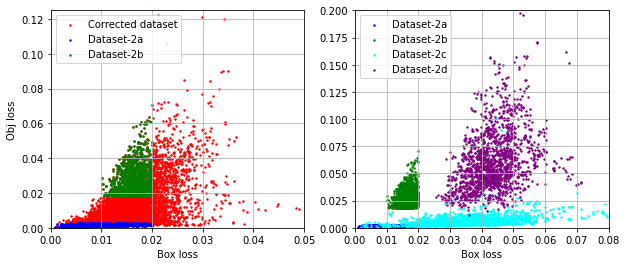

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(rank['box'], rank['obj'], s=2, color='r', label='Corrected dataset')
plt.scatter(data_2a['box'], data_2a['obj'], s=2, color='b', label='Dataset-2a')
plt.scatter(data_2b['box'], data_2b['obj'], s=2, color='g', label='Dataset-2b')
plt.grid()
plt.xlim([0, 0.05])
plt.ylim([0, 0.125])
plt.xlabel('Box loss')
plt.ylabel('Obj loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(data_2a['box'], data_2a['obj'], s=2, color='b', label='Dataset-2a')
plt.scatter(data_2b['box'], data_2b['obj'], s=2, color='g', label='Dataset-2b')
# plt.scatter(robbins_rank['box'], robbins_rank['obj'], s=1, color='yellow', label='robbins dataset')
plt.scatter(robbins_2c[:, 0], robbins_2c[:, 1], s=2, color='cyan', label='Dataset-2c')
plt.scatter(robbins_2d[:, 0], robbins_2d[:, 1], s=2, color='purple', label='Dataset-2d')
plt.xlim([0, 0.08])
plt.ylim([0, 0.2])
plt.grid()
plt.xlabel('Box loss')

plt.legend()
plt.show()

## save datasets

In [ ]:
def save(name: str, data: set):
    f = open('combined/' + name, 'w')
    for img in tqdm(data):
        f.write('../Robbins-to-THEMIS/combined/images/' + img + '.png\n')
        f.write('../Robbins-to-THEMIS/combined/images/' + img + '_v.png\n')
        f.write('../Robbins-to-THEMIS/combined/images/' + img + '_h.png\n')
        f.write('../Robbins-to-THEMIS/combined/images/' + img + '_vh.png\n')
    f.close()

save('data_2a.txt', data_2a_set)
save('data_2b.txt', data_2b_set)

In [ ]:
for name in tqdm(os.listdir('combined')):
    if not name.endswith('txt'):
        continue
    f = open('combined/' + name, 'r')
    buffer = f.read()
    f.close()
    buffer = buffer.replace('combined', 'robbins')
    f = open('robbins/' + name, 'w')
    f.write(buffer)
    f.close()

os.system('mv robbins/data_2a.txt robbins/data_2c.txt')
os.system('mv robbins/data_2b.txt robbins/data_2d.txt')

## 2e

In [ ]:
os.system('mkdir 2e')
os.system('mkdir 2e/images')
os.system('mkdir 2e/labels')
os.system('mkdir 2e/yolo_labels')

In [ ]:
f = open('combined/data_2a.txt', 'r')
data_2a = f.read()
f.close()

f = open('combined/data_2b.txt', 'r')
data_2b = f.read()
f.close()

data_2a_2b = (data_2a + data_2b).splitlines()
random.shuffle(data_2a_2b)


for line in tqdm(data_2a_2b[::2]):
    img_name = line.split('/')[-1]
    os.system('cp combined/images/%s 2e/images/%s' % (img_name, img_name))

    lbl_name = img_name[:-3] + 'txt'
    os.system('cp combined/labels/%s 2e/labels/%s' % (lbl_name, lbl_name))
    os.system('cp combined/yolo_labels/%s 2e/yolo_labels/%s' % (lbl_name, lbl_name))